## Исследование выборки из экспоненциального распределения

Импортируем все необходимое.

In [45]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from scipy.stats import expon, norm

Сгенерируем выборку из 1000 экспоненциально распределенных случайных величин с параметром lambda = 5

In [46]:
lam = 5.
exp_1 = expon.rvs(0, 1/lam, 1000)

Сравним гистограмму сгенерированной выборки и теоретическую плотность.

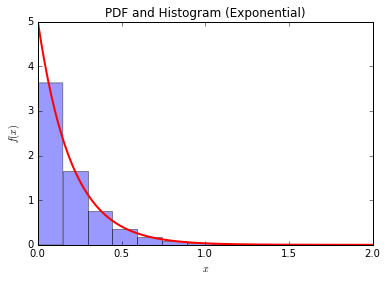

In [70]:
x = np.linspace(0, 2, 100)
# Для отображения гистограммы и функции плотности вероятности на одном графике.
fig, plt1 = plt.subplots(1, 1)

# Теоретическая плотность
plt1.plot(x, expon.pdf(x, 0, 1/lam), 'r', lw = 2)

# Гистограмма выборки
plt1.hist(exp_1, normed = True, alpha=0.4)

plt.title('PDF and Histogram (Exponential)')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Посмотрим на распределение выборочных средних выборок для различного числа величин в выборке и сравним их с результатом, предсказываемым центральной предельной теоремой.

Теоретические значения матожидания и дисперсии для экспоненциальной случайной величины

In [60]:
mean = 1/lam
var = 1/(lam*lam)

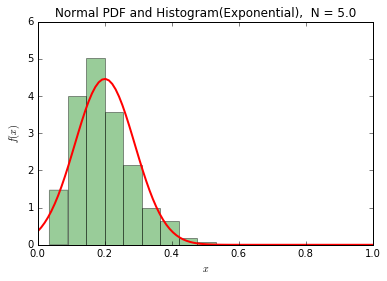

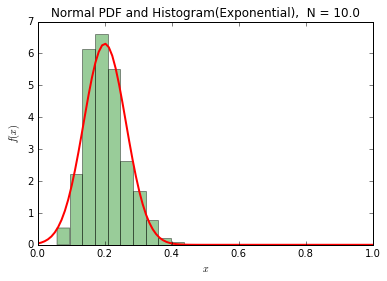

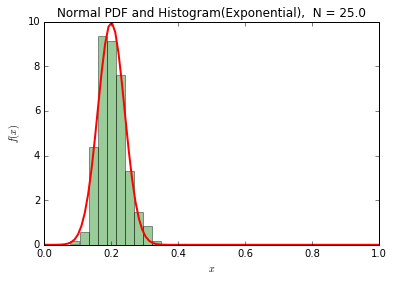

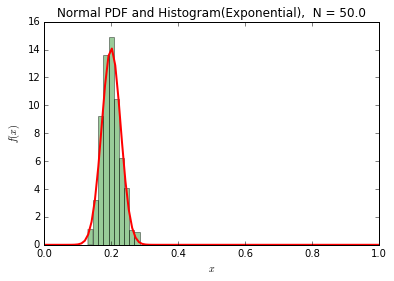

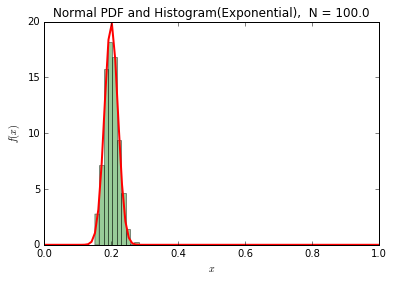

In [71]:
# Матожидание распределения выборочного среднего согласно ЦПТ
cpt_mean = mean

x = np.linspace(0, 1, 100)

for N in [5., 10., 25., 50., 100.]:
    # Сгенерируем 1000 выборок из N элементов каждая и запишем их выборочные средние
    data = [sum(expon.rvs(0, 1/lam, N))/N for i in xrange(1000)]
    
    # Дисперсия распределения выборочного среднего согласно ЦПТ
    cpt_var = var/N
    
    # Плотность нормального распредения из ЦПТ
    plt.plot(x, norm.pdf(x, cpt_mean, math.sqrt(cpt_var)), color = 'r', lw = 2)
    
    # Гистограмма
    plt.hist(data, normed = True, alpha = 0.4, color = 'g')
    
    plt.title("Normal PDF and Histogram(Exponential),  N = "+ str(N))
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()


## Выводы

Как видно из графиков выше, нормальное распределение, предсказываемое центральной предельной теоремой, все лучше описывает гистограмму реальной выборки данных.
Согласно центральной предельной теореме выборочное среднее выборки данных имеет распределение N(mu, sigma/n), где mu, sigma - матожидание и дисперсия распределения, n - количество элементов в выборке, из которого получена выборка. С ростом n точность аппроксимации растет.